In [1]:
!pip install -q pandas scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [8]:
intern_data = pd.DataFrame({
    'Intern_Name': [
        'Ayesha', 'Ali', 'Sara', 'Hamza', 'Zara', 'Bilal',
        'Sana', 'Usman', 'Fatima', 'Musa', 'Hassan', 'Areeba'
    ],
    'Skills': [
        'Python, Pandas, SQL, Data Visualization',
        'HTML, CSS, JavaScript, React',
        'NLP, Transformers, PyTorch, Hugging Face',
        'Linux, Network Security, Wireshark, Bash',
        'Excel, Power BI, SQL, Business Analysis',
        'Java, Spring Boot, REST API, MySQL',
        'Python, Scikit-learn, Data Cleaning, Jupyter',
        'C++, Data Structures, Algorithms, Git',
        'Python, SQL, Excel, Tableau',
        'Node.js, Express, MongoDB, Docker',
        'AWS, Terraform, Linux, CI/CD',
        'Figma, Wireframing, UX Research, Prototyping'
    ]
})
industry_jobs = pd.DataFrame({
    'Job_Title': [
        'Data Analyst', 'Frontend Developer', 'NLP Engineer', 'Security Analyst',
        'Business Analyst', 'Backend Developer', 'ML Engineer', 'Software Engineer',
        'DevOps Engineer', 'Cloud Engineer', 'UI/UX Designer', 'Data Engineer'
    ],
    'Required_Skills': [
        'Python, SQL, Power BI, Tableau, Excel',
        'HTML, CSS, JavaScript, React, Typescript',
        'NLP, Transformers, Deep Learning, PyTorch, BERT',
        'Linux, Penetration Testing, Wireshark, Nmap',
        'Excel, SQL, Business Analysis, Stakeholder Communication',
        'Java, Spring Boot, REST API, MongoDB',
        'Python, Machine Learning, Scikit-learn, Feature Engineering',
        'C++, Git, OOP, Data Structures, Algorithms',
        'Linux, Docker, Jenkins, CI/CD, AWS',
        'AWS, Terraform, CloudFormation, Python',
        'Figma, Wireframing, UX Research, Adobe XD',
        'Python, SQL, ETL, Data Pipelines, Airflow'
    ]
})



In [10]:
#TF-IDF AND CLUSTERING
combined = pd.concat([
    intern_data[['Skills']].rename(columns={'Skills': 'Text'}),
    industry_jobs[['Required_Skills']].rename(columns={'Required_Skills': 'Text'})
], ignore_index=True)

vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(', '), lowercase=True)
X = vectorizer.fit_transform(combined['Text'])

kmeans = KMeans(n_clusters=4, random_state=42)
combined['Cluster'] = kmeans.fit_predict(X)

#SIMILARITY AND SKILL GAP
intern_vecs = X[:len(intern_data)]
job_vecs = X[len(intern_data):]
similarity_matrix = cosine_similarity(intern_vecs, job_vecs)

gap_results = []
for i, intern in intern_data.iterrows():
    match_idx = similarity_matrix[i].argmax()
    match_score = similarity_matrix[i][match_idx]

    intern_skills = set(intern['Skills'].lower().split(', '))
    job_skills = set(industry_jobs.iloc[match_idx]['Required_Skills'].lower().split(', '))
    missing_skills = job_skills - intern_skills

    gap_results.append({
        'Intern': intern['Intern_Name'],
        'Matched_Job': industry_jobs.iloc[match_idx]['Job_Title'],
        'Match_Score (0-1)': round(match_score, 2),
        'Missing_Skills': ', '.join(missing_skills) if missing_skills else 'None '
    })

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
gaps_df = pd.DataFrame(gap_results)
print("🔍 Skill Gap Report:\n")
print(gaps_df)

🔍 Skill Gap Report:

    Intern         Matched_Job  Match_Score (0-1)  \
0   Ayesha        Data Analyst               0.28   
1      Ali  Frontend Developer               0.87   
2     Sara        NLP Engineer               0.62   
3    Hamza    Security Analyst               0.40   
4     Zara    Business Analyst               0.66   
5    Bilal   Backend Developer               0.73   
6     Sana         ML Engineer               0.37   
7    Usman   Software Engineer               0.87   
8   Fatima        Data Analyst               0.85   
9     Musa   Backend Developer               0.23   
10  Hassan     DevOps Engineer               0.61   
11  Areeba      UI/UX Designer               0.70   

                           Missing_Skills  
0                tableau, excel, power bi  
1                              typescript  
2                     deep learning, bert  
3               nmap, penetration testing  
4               stakeholder communication  
5                        

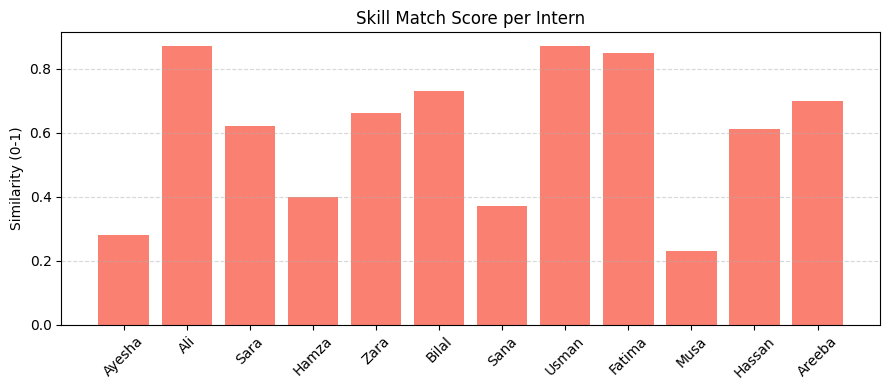

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 4))
plt.bar(gaps_df['Intern'], gaps_df['Match_Score (0-1)'], color='salmon')
plt.title('Skill Match Score per Intern')
plt.ylabel('Similarity (0-1)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()